<a href="https://colab.research.google.com/github/Maspur102/AI_KLP_4/blob/main/Mean%20Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

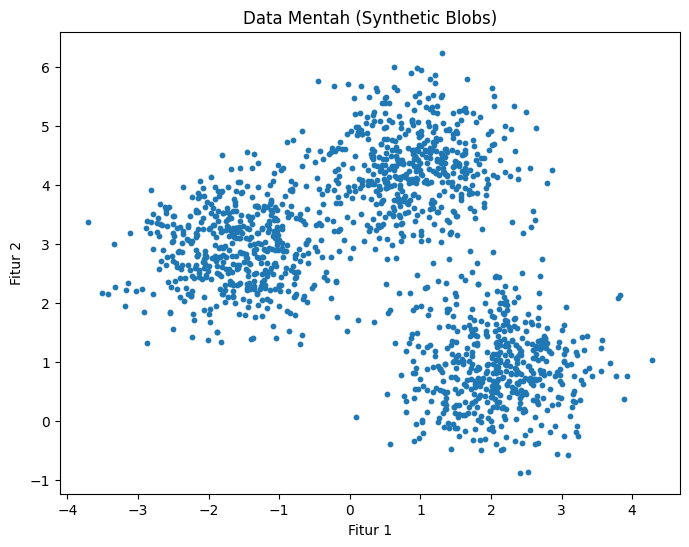

In [2]:
# Jumlah sampel data
n_samples = 1500

# Buat data blobs dengan 3 pusat cluster
# n_features=2 untuk visualisasi 2D
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, random_state=0)

# Visualisasikan data mentah
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Data Mentah (Synthetic Blobs)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

In [4]:
# Estimasi bandwidth secara otomatis
# quantile: proporsi sampel yang akan digunakan untuk estimasi
# n_samples: jumlah sampel yang akan digunakan
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=n_samples)

print(f"Estimasi Bandwidth: {bandwidth:.2f}")

Estimasi Bandwidth: 1.27


In [5]:
# Inisialisasi dan latih model Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Dapatkan label cluster dan pusat cluster
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Hitung jumlah cluster yang ditemukan
n_clusters_ = len(np.unique(labels))

print(f"Jumlah cluster yang ditemukan: {n_clusters_}")

Jumlah cluster yang ditemukan: 3


<ipython-input-6-2209457782>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,


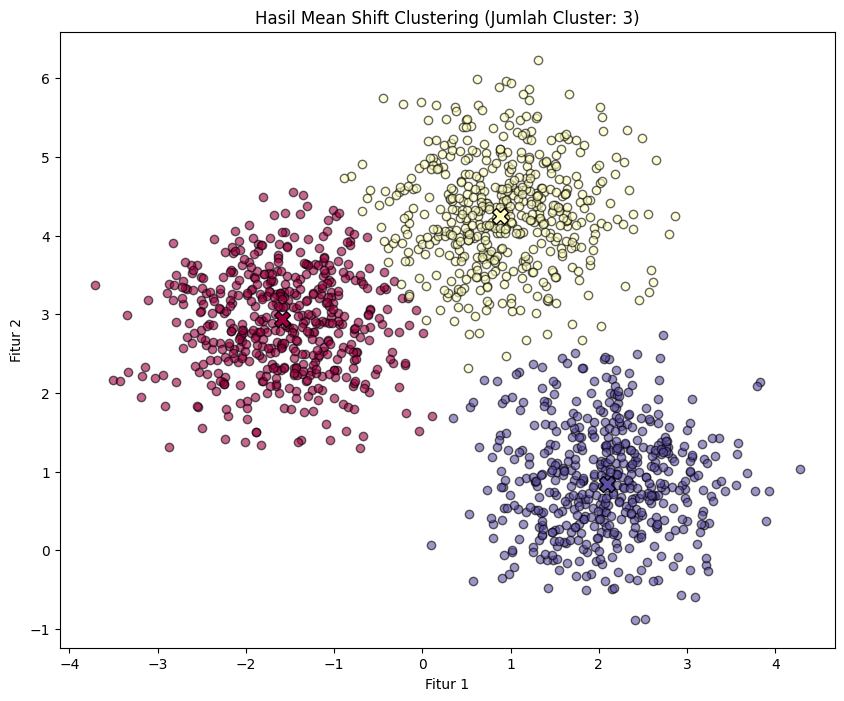

In [6]:
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters_)) # Warna untuk setiap cluster

# Plot setiap titik data dengan warna cluster yang sesuai
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6, alpha=0.6)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=12, marker='X') # Tandai pusat cluster

plt.title(f"Hasil Mean Shift Clustering (Jumlah Cluster: {n_clusters_})")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

In [7]:
# Hitung Silhouette Score
# Pastikan ada lebih dari 1 cluster yang ditemukan, jika tidak, silhouette_score tidak dapat dihitung
if n_clusters_ > 1:
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Tidak dapat menghitung Silhouette Score karena hanya 1 cluster yang ditemukan.")

Silhouette Score: 0.605
